In [1]:
import healpy as hp
import matplotlib.pyplot as plt
import sys
import numpy as np
from tqdm import tqdm
sys.path.append('../../')

In [2]:
%load_ext autoreload
%autoreload 2
from cobi.simulation import LATsky
from cobi.spectra import Spectra
from cobi.mle import MLE

In [3]:
libdir = '/global/cfs/cdirs/sobs/cosmic_birefringence/v0'
nside = 2048
cb_model = "iso"
beta = 0.35
alpha = [-0.1,-0.1,0.2,0.2,.15,.15]
alpha_err = 0.1

In [4]:
lat = LATsky(libdir, nside, cb_model, beta, alpha=alpha,alpha_err=alpha_err, bandpass=True,verbose=True,noise_model='TOD')

CMB : INFO - Loading CMB power spectra from file
CMB : INFO - Isotropic(constant) cosmic birefringence model selected
Mask : INFO - Upgrading mask LAT resolution
Noise : INFO - Noise Model: [LAT] Based on TOD and Map based simulations, directly using SO products.


In [5]:
# for i in range(100):
#     lat.checkObsQU(i,what='filesize')

In [6]:
spec = Spectra(lat, libdir, cache=True,parallel=1)
#spec.Compute(3 , sync=True)

Spectra : INFO - Reading apodised mask from /global/cfs/cdirs/sobs/cosmic_birefringence/v0/spectra_2048_aposcale2p0/workspaces/mask_N2048_aposcale2p0_CO_PS.fits
Spectra : INFO - Reading coupling Matrix from /global/cfs/cdirs/sobs/cosmic_birefringence/v0/spectra_2048_aposcale2p0/workspaces/coupling_matrix_N2048_fsky0p55_aposcale2p0_bw1_CO_PS.fits
Spectra : INFO - Parallelized single loop


In [7]:
fit = "Ad + beta + alpha"
binwidth = 10
bmin = 50
bmax = 2000
mle = MLE(libdir,spec,fit, alpha_per_split=False,rm_same_tube=True,binwidth=binwidth,bmin=bmin,bmax=bmax)

CMB : INFO - Loading CMB power spectra from file


CMB : INFO - Isotropic(constant) cosmic birefringence model selected


Fitting a common polarisation angle per frequency
Don't use cross-spectra of bands within the same optical tube


In [10]:
mle.estimate_angles(0).keys()

dict_keys(['Ad', 'beta', '27', '39', '93', '145', '225', '280'])

In [7]:
beta = []
for i in range(100):
    beta.append(mle.estimate_angles(i)['beta'])
beta = np.array(beta)

In [8]:
np.mean(beta)

0.33945288170197757

In [9]:
np.std(beta)

1.5283886310796797

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  1.,  1.,  2.,  2.,  3.,  5.,  5.,  6., 12.,
         7., 18.,  8.,  6.,  4.,  4.,  4.,  1.,  2.,  0.,  1.,  1.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  1.]),
 array([-6.24977655, -6.00742386, -5.76507117, -5.52271848, -5.28036579,
        -5.0380131 , -4.79566041, -4.55330772, -4.31095503, -4.06860234,
        -3.82624965, -3.58389696, -3.34154426, -3.09919157, -2.85683888,
        -2.61448619, -2.3721335 , -2.12978081, -1.88742812, -1.64507543,
        -1.40272274, -1.16037005, -0.91801736, -0.67566467, -0.43331198,
        -0.19095929,  0.0513934 ,  0.29374609,  0.53609879,  0.77845148,
         1.02080417,  1.26315686,  1.50550955,  1.74786224,  1.99021493,
         2.23256762,  2.47492031,  2.717273  ,  2.95962569,  3.20197838,
         3.44433107,  3.68668376,  3.92903645,  4.17138914,  4.41374184,
         4.65609453,  4.89844722,  5.14079991,  5.3831526 ,

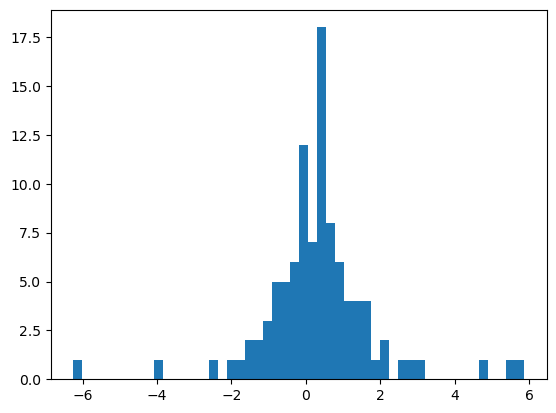

In [10]:
plt.hist(beta, bins=50)